In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt
from cmdstanpy import CmdStanModel
import arviz as az

az.style.use("arviz-darkgrid")
np.random.seed(0)

script_dir = os.path.dirname('autoML.ipynb')

In [3]:
N = 40  # アリスのデザインA案の表示数
a = 2   # アリスのデザインA案のクリック数

file_path = os.path.join(script_dir, 'model.stan')
model = CmdStanModel(stan_file=file_path)

data = {'N': N, 'a': a, 'prior_a':1, 'prior_b':1}

fit = model.sample(
  data=data,
  chains=2,
  seed=0,
  iter_warmup=1000,
  iter_sampling=5000,
  show_progress=True
)

cmdstanpy_data = az.from_cmdstanpy(
    posterior=fit,
    log_likelihood="lp__",
)

print(fit.diagnose())

05:52:55 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

05:52:55 - cmdstanpy - INFO - CmdStan done processing.



Processing csv files: /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmpnez7m7zh/model22gt739m/model-20230421055255_1.csv, /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmpnez7m7zh/model22gt739m/model-20230421055255_2.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



In [4]:
fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,-11.348300,0.012931,0.766539,-12.924500,-11.045700,-10.809500,3513.82,33786.7,1.00013
theta,0.070999,0.000644,0.039608,0.019248,0.063778,0.145619,3786.57,36409.3,1.00080


/Users/tueno/.pyenv/versions/3.11.0/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


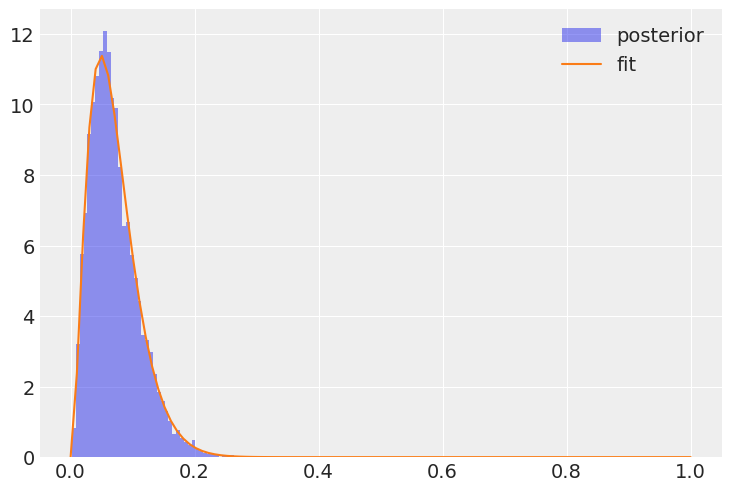

In [5]:
# what is the posterior distribution of theta?
# module import
import scipy.optimize
import scipy.stats as stats

theta_samples = fit.stan_variable('theta')
# Fit a beta distribution to the posterior samples
prior_a, prior_b, loc, scale = stats.beta.fit(theta_samples)

# Plot the histogram of the posterior samples and the fitted beta distribution
x = np.linspace(0, 1, 100)
plt.hist(theta_samples, bins=50, density=True, alpha=0.5, label='posterior')
plt.plot(x, stats.beta.pdf(x, prior_a, prior_b, loc, scale), label='fit')
plt.legend()
plt.show()

In [6]:
N = 50  # アリス二週間目のデザインA案の表示数
a = 1   # アリス二週間のデザインA案のクリック数

file_path = os.path.join(script_dir, 'model.stan')
model = CmdStanModel(stan_file=file_path)

data = {'N': N, 'a': a, 'prior_a':prior_a, 'prior_b':prior_b}

fit = model.sample(
  data=data,
  chains=2,
  seed=0,
  iter_warmup=1000,
  iter_sampling=5000,
  show_progress=True
)

cmdstanpy_data = az.from_cmdstanpy(
    posterior=fit,
    log_likelihood="lp__",
)

print(fit.diagnose())

05:52:56 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

05:52:56 - cmdstanpy - INFO - CmdStan done processing.



Processing csv files: /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmpnez7m7zh/modelvoun9f2j/model-20230421055256_1.csv, /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmpnez7m7zh/modelvoun9f2j/model-20230421055256_2.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



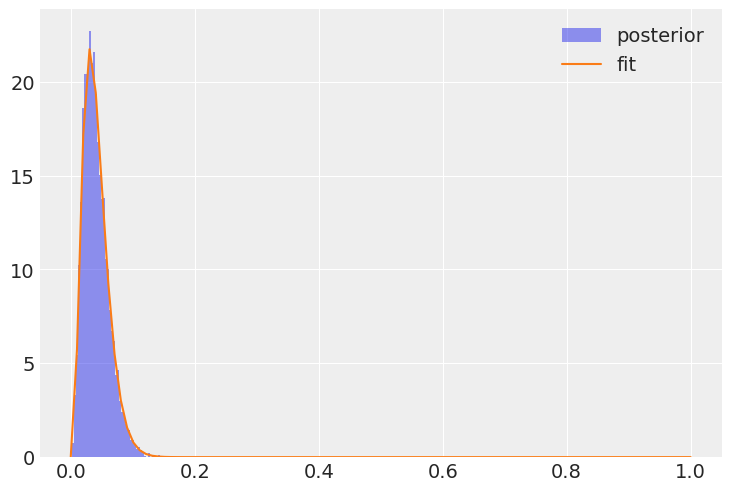

In [7]:
# what is the posterior distribution of theta?
# module import
import scipy.optimize
import scipy.stats as stats

theta_samples = fit.stan_variable('theta')
# Fit a beta distribution to the posterior samples
prior_a, prior_b, loc, scale = stats.beta.fit(theta_samples)

# Plot the histogram of the posterior samples and the fitted beta distribution
x = np.linspace(0, 1, 100)
plt.hist(theta_samples, bins=50, density=True, alpha=0.5, label='posterior')
plt.plot(x, stats.beta.pdf(x, prior_a, prior_b, loc, scale), label='fit')
plt.legend()
plt.show()